In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn import metrics


# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

#1.**Find the linear regression equation for this data.**

In [ ]:

df.head() #Reading the head of the data set(We will get the first 5 rows of the dataset here.)


,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


## The target variable is numerical and continuous so we can apply Linear Regression here.
#In my point of view, Iam applying the Linear regression ML model step by step(6 JARS OF ML)
#1.Data- The data is cleaned here and also we are having continous feature.No encoding is required.

#2.Task- Task here is Supervised Learning - Linear Regression.
#3.Model= The model for Linear Regression is **y=m*x+c**.Even though the dataset is continous and is having only one independant feature we need to check by using visulaization technique whether it forms a linear relation or not.
#If there is no linear relation then we need to transform the data and check.
#4.Loss
#5.Learning
#6.Evaluation Metric- r2 score

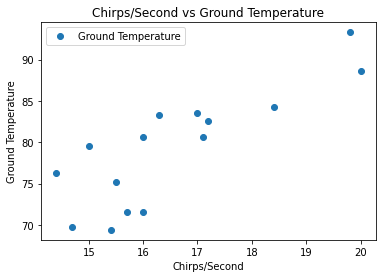

In [ ]:

df.plot(x='Chirps/Second', y='Ground Temperature', style='o')
plt.title('Chirps/Second vs Ground Temperature')
plt.xlabel('Chirps/Second')
plt.ylabel('Ground Temperature')
plt.show()


In [ ]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


#There is a linear relationship between Chirps/second and the Temperature and also the correlation is high. No transformation required.

In [ ]:
x = df.iloc[:, :-1].values #Features as arrays
y = df.iloc[:, 1].values #Target as arrays
#Split the data into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 777)

In [ ]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # Predicted temperature = m * chirps/second + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [ ]:
X_train.shape, X_test.shape

((12, 1), (3, 1))

In [ ]:
c=regressor.intercept_ # c
print(c)

26.01326241134754


In [ ]:
m=regressor.coef_ # the final learnt model is Predicted temperature = 3.23829787 *Chirps/second + 26.01326241134754
print(m)

[3.23829787]


In [ ]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred
df1=pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
df1

,y_test,y_pred
0,69.4,75.883050
1,80.6,77.826028
2,75.2,76.206879


#The Linear Regression equation for Cricket chirps/second vs Temperature dataset**(hat{y}=3.23*Chirps/second + 26.01)**

#**2.Chart the original data and the equation on the chart.**

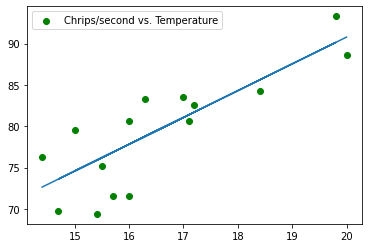

In [ ]:
plt.scatter(x, y, c='g', label='Chrips/second vs. Temperature')
plt.plot(x, m*x + c)
plt.legend()
plt.show()


#3.Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
from sklearn.metrics import r2_score
print('R2 :', np.sqrt(metrics.r2_score(y_test, y_pred)))

R2 : 0.43746184023063245


#R2 score is 0.43 here that means the equation is not a good fit for the model.Since there is low number of data points available for training and testing. We can increase R2 score if we take the data only for training.

In [ ]:
#We are considering all the datapoints for training and let us see the R2 score.
 
a = df[['Ground Temperature']]
b = df['Chirps/Second']
regression=linear_model.LinearRegression()
regression.fit(a,b)
print('intercept:', regression.intercept_)
print('coefficient:', regression.coef_) 


intercept: 0.45931464523595267
coefficient: [0.20299973]


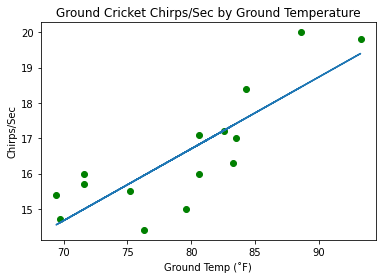

In [ ]:
plt.scatter(a, b, color='g')
plt.plot(a, regression.predict(a))
plt.title('Ground Cricket Chirps/Sec by Ground Temperature')
plt.xlabel('Ground Temp (˚F)')
plt.ylabel('Chirps/Sec')
plt.show()

#**Linear Regression equation for Ground Cricket Chirps dataset.**
#**y = 0.2030 * x + 0.4593**


In [ ]:
print('r-squared: ', regression.score(a,b))

r-squared:  0.6922946529146998


#When we don't split the data as test and train the R2 score value increased to **.69**.This means if there is more data that we train the model the better it will be.

#**Extrapolate**

In [ ]:
t=regression.predict([[95]])
print('At 95˚F, our approximation of chirps/sec is:',int(t))

At 95˚F, our approximation of chirps/sec is: 19


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


#**Interploate**

In [ ]:
r=(18 - regression.intercept_) / regression.coef_
print('With an observation of 18 chirps/sec,we expect ground temp =',"{:.4f}".format(float(r)),'F')

With an observation of 18 chirps/sec,we expect ground temp = 86.4074 F


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df_bw = pd.read_fwf("brain_body.txt")

In [ ]:
df_bw.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [ ]:
x = df_bw[['Body']]
y = df_bw['Brain']

In [ ]:
linear = linear_model.LinearRegression()
linear.fit(x, y)

LinearRegression()

In [ ]:
print('intercept:', linear.intercept_)
print('coefficient:', linear.coef_)

intercept: -56.85554542859637
coefficient: [0.90291295]


#**1.Find the linear regression equation for this data for brain weight to body weight.**

#The Linear Regression equation for Brain vs.Body Weight dataset is **(hat{y}=0.902*Bodyweight+ -56.855)**

#**Chart the original data and the equation on the chart.**

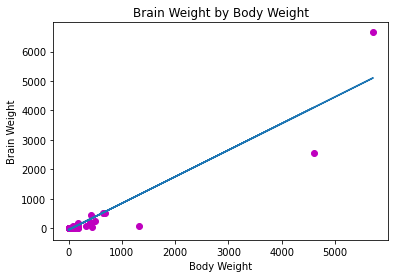

In [ ]:
plt.scatter(x, y, color='m')
plt.plot(x, linear.predict(x))
plt.title('Brain Weight by Body Weight')
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')
plt.show()

#**3.R2 score**

In [ ]:
print('R^2 score for this equation: {:.4f}'
      .format(linear.score(x, y)))

R^2 score for this equation: 0.8727


#**The R^2 score is greater than 0.8, so the equation is a good fit for this data **

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
df.head()


,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [ ]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [ ]:
df.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


In [ ]:
feature = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']
x = df[feature]
y = df.Salary

In [ ]:
lr = linear_model.LinearRegression()
lr.fit(x, y)

LinearRegression()

In [ ]:
print('Features & Coefficients')
print(list(zip(feature, lr.coef_)))

Features & Coefficients
[('Sex', 1241.792499601427), ('Rank', 5586.1814495214385), ('Year', 482.85976782882153), ('Degree', -1331.6440634059095), ('YSdeg', -128.79057354486122)]


In [ ]:
lr.intercept_

11410.14654725559

#**Linear Regression equation- [ 1241.7924996   5586.18144952   482.85976783 -1331.64406341-128.79057354] + 11410.14654725559**

In [ ]:
print('The equation for columns {} with respect to Salary:\n'
          '{} + {}'.format(feature, lr.coef_,lr.intercept_))

The equation for columns ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'] with respect to Salary:
[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354] + 11410.14654725559


In [ ]:
def lin_r2(feature, df, sal='Salary'):
    input = df[feature]
    output = df[sal]
    lr = linear_model.LinearRegression()
    lr.fit(input,output)
    return lr.score(input,output)

In [ ]:
print('R^2 score for equation using all columns: {}'.format(lin_r2(feature,df)))

R^2 score for equation using all columns: 0.8547180674410969


#**3.Selection of columns with best R2 score**

In [ ]:
import itertools as it #Itertools is a module in python, it is used to iterate over data structures that can be stepped over using a for-loop.
# Such data structures are also known as iterables.

In [ ]:
#itertools.combinations() module in Python to print all possible combinations
def get_combo(cols):
    return [it.combinations(cols, n + 1) for n in range(len(cols))]

combos = get_combo(feature)

In [ ]:
def all_combo_scores(combos, df, focus='Salary'):
    combo_scores = {}
    for m in range(len(list(combos))):
        for n in list(combos[m]):
            combo_scores[lin_r2(list(n), df, focus)] = n
    return combo_scores

In [ ]:
combo_scores = all_combo_scores(combos, df)
sorted(combo_scores.items(), key=lambda c: c[0], reverse=True)

[(0.8547180674410969, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8490366192262851, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.8485077204335426, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8456725764485598, ('Rank', 'Year', 'YSdeg')),
 (0.845547641297936, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.8454319861987166, ('Sex', 'Rank', 'Year')),
 (0.8437395200874137, ('Rank', 'Year', 'Degree')),
 (0.8436480933264597, ('Rank', 'Year')),
 (0.7671813414350668, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7666122610227071, ('Sex', 'Rank', 'YSdeg')),
 (0.7625149185326454, ('Rank', 'Degree', 'YSdeg')),
 (0.7623948189698249, ('Rank', 'YSdeg')),
 (0.7583144768153613, ('Sex', 'Rank', 'Degree')),
 (0.7557961688386643, ('Rank', 'Degree')),
 (0.7554917749443395, ('Sex', 'Rank')),
 (0.7525360539274633, ('Rank',)),
 (0.6311597502907436, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6236261611533503, ('Year', 'Degree', 'YSdeg')),
 (0.5832708257660315, ('Sex', 'Degree', 'YSdeg')),
 (0.5808063918180405, ('Sex', 'Year', 

#**R2 score including all feature = 0.8547 but there is two dominant factors "Rank" & "Year" itself scores 0.8436**

#**3.Report whether sex is a factor in salary.**

 **Sex on its own has a score very close to zero (0.063898925832880038), indicating that it has no direct influence on salary.**